<a href="https://colab.research.google.com/github/Manjunath-Yelipeta/EVA/blob/master/Project4/SecondDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

#Second Neural Network Model

#### This is the second neural network model without Batch Normalization, dropout , change of learning rate  included.


## Improvement over Previous network 

#### 1) Have added Bottleneck layers i.e 1*1 convolutions with maxpooling
#### 2) Have increased the number  of 3*3 convolutions 
#### 3)Have positioned the bottleneck layer after 7*7 receptive field
#### 4)Have added the validation data check in fit method.
#### 5)Has maintained the distance of maxpooling from prediction layer.
#### 6)Have stopped the convolution with a bigger sized kernel


### Total Number of parameters used :  12868
### Total Number of epoch trained : 20
### Batch size used while training = 32
### Validation accuracy acheived after 20 epochs : 99.05%

#### Installing keras library using pip

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


#### Importing libraries needed for convolutions and mnist dataset

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


#### Plotting the Image 

(60000, 28, 28)


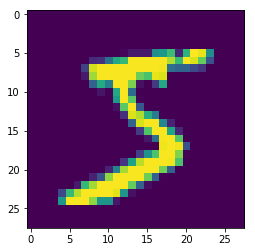

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

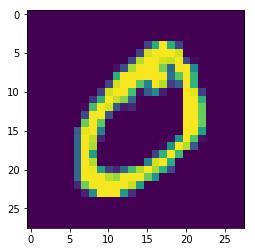

In [5]:
plt.imshow(X_train[1])

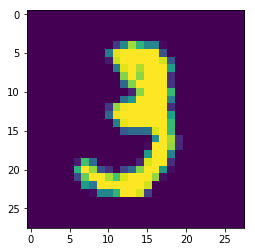

In [6]:
plt.imshow(X_train[10])

#### Reshaping the Image into required format

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#### Converting train and test data into float and normalizing the data

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### seeing the first 10 training labels

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

####  Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Checking the training labels after converting them to 10-dimensional class matrices.

In [56]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### Importing the required operators for convolutions

In [0]:
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Flatten,GlobalAveragePooling2D,Dropout

# Second Neural Network Model

In [51]:

model1 = Sequential()
model1.add(Convolution2D(8,3,3,input_shape=(28,28,1))) #(3*3,26*26) of the form (effective global receptive field,output channel size )
model1.add(Activation('relu'))


model1.add(Convolution2D(10,3,3)) #(5*5,24*24)
model1.add(Activation('relu'))



model1.add(Convolution2D(32,3,3)) #(7*7,22*22)
model1.add(Activation('relu'))

#since the image size is 28*28*1,Adding the bottleneck layer after 7*7 receptive field.
model1.add(Convolution2D(8,1,1)) #(7*7,22*22)
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) #(14*14,11*11)


model1.add(Convolution2D(10,3,3)) #(16*16,9*9)
model1.add(Activation('relu'))


model1.add(Convolution2D(32,3,3)) #(18*18,7*7)
model1.add(Activation('relu'))

model1.add(Convolution2D(10,1,1)) #(18*18,7*7)
model1.add(Activation('relu'))


model1.add(Convolution2D(10,7,7)) #(24*24,10*1*1)
#passing the final activations through softmax layer.
model1.add(Flatten())
model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call t

#### Printing the summary of the model

In [52]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
activation_55 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 10)        730       
_________________________________________________________________
activation_56 (Activation)   (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 22, 22, 32)        2912      
_________________________________________________________________
activation_57 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 22, 22, 8)         264       
__________

#### Importing the Adam optimizer.

In [0]:
from keras.optimizers import Adam

#### Compiling the model with specifying loss function for classification and optimizer

In [0]:
model1.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

#### Training the model for 20 Epochs.

In [55]:
model1.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.1568 - acc: 0.9516 - val_loss: 0.0751 - val_acc: 0.9755
Epoch 2/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0688 - acc: 0.9787 - val_loss: 0.0563 - val_acc: 0.9822
Epoch 3/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0542 - acc: 0.9833 - val_loss: 0.0545 - val_acc: 0.9819
Epoch 4/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0476 - acc: 0.9859 - val_loss: 0.0535 - val_acc: 0.9820
Epoch 5/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0421 - acc: 0.9866 - val_loss: 0.0400 - val_acc: 0.9861
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0372 - acc: 0.9883 - val_loss: 0.0464 - val_acc: 0.9860
Epoch 7/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0337 - acc: 0.9893 - val_loss: 0.

#### getting the score on the test data

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0)

#### Printing the score of test data evaluated by model

In [58]:
print(score)

[0.040291319600494716, 0.9905]


In [59]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### getting the predictions on test data

In [0]:
y_pred = model1.predict(X_test)

#### Seeing the first nine predictions

In [61]:
print(y_pred[:9])
print(y_test[:9])

[[2.13293164e-12 6.70616059e-15 1.36588163e-11 1.47466483e-09
  1.19638102e-17 3.49860606e-16 6.10927905e-26 1.00000000e+00
  1.93679138e-13 1.86969551e-09]
 [3.58907850e-14 1.84553046e-14 1.00000000e+00 1.16273536e-16
  1.71068604e-25 7.18286960e-22 1.98302746e-13 2.57348329e-20
  7.42100744e-14 7.22034906e-20]
 [7.77419969e-12 9.99981999e-01 7.71501561e-07 1.25214206e-09
  3.35511572e-06 4.17351066e-06 7.01514136e-09 9.62471859e-06
  2.18151719e-08 7.62998766e-08]
 [9.99989152e-01 3.42992317e-13 1.16636141e-08 7.14554772e-13
  3.17881450e-11 2.99961052e-08 8.34592265e-06 1.00953350e-10
  1.48236525e-08 2.51553570e-06]
 [1.41544235e-16 5.89553026e-19 1.25674755e-15 1.34971529e-20
  1.00000000e+00 1.80228503e-20 1.06158573e-17 1.01004404e-16
  2.86368208e-16 3.79124232e-10]
 [3.72897581e-14 9.99997735e-01 6.87993520e-08 1.00841210e-11
  1.99967167e-06 1.78222062e-10 9.25516552e-10 1.40607099e-07
  5.45722401e-09 6.64575905e-09]
 [5.06695394e-23 2.45456411e-12 3.16013627e-13 3.58222864e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model1.layers])

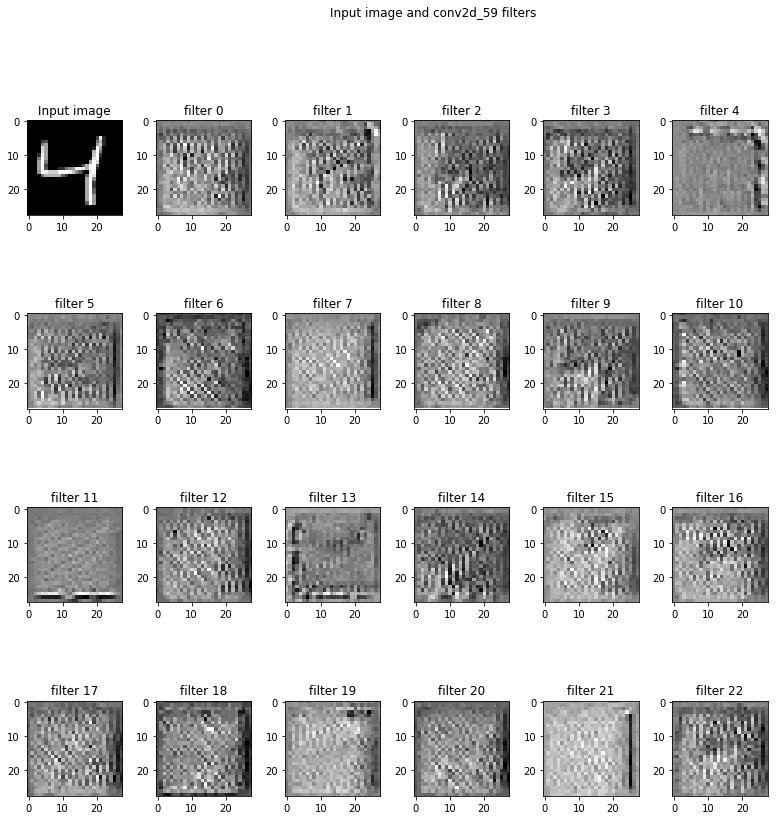

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_59'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model1.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model1.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()